EDA-2. Temporal Drift 향 선택 실패는 언제 발생하는가

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data_csv/fra_perfumes.csv", encoding="utf-8")
text = df["Description"].fillna("").str.lower()

In [5]:
time_words = ["after","dry down","hours","later","longevity"]
neg_words = ["disappointed","headache","too strong","metallic","sour","nauseating"]

has_time = text.apply(lambda x: any(w in x for w in time_words))
has_neg = text.apply(lambda x: any(w in x for w in neg_words))

p_neg_given_time = has_neg[has_time].mean()
p_neg_given_no_time = has_neg[~has_time].mean()

pd.DataFrame({
    "condition": ["Time mentioned", "No time mentioned"],
    "P(negative)": [p_neg_given_time, p_neg_given_no_time]
})

,condition,P(negative)
0,Time mentioned,0.000000
1,No time mentioned,0.003826


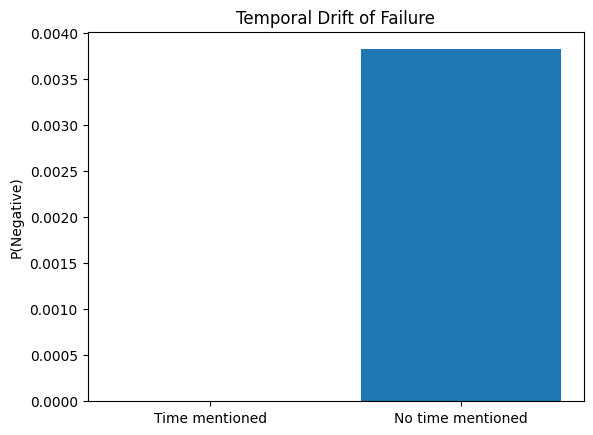

In [6]:
plt.bar(
    ["Time mentioned", "No time mentioned"],
    [p_neg_given_time, p_neg_given_no_time]
)
plt.ylabel("P(Negative)")
plt.title("Temporal Drift of Failure")
plt.show()

Fragrantica 요약 데이터에서는 시간 경과에 따른 향 선택 실패를 포착할 수 없었다.

이는 실패 경험이 요약 단계 이전, 실제 사용자 리뷰 서술 단계에서 발생함을 시사한다.

→ Temporal Drift는 이 데이터셋으로는 관측 불가능

EDA-2B. Temporal Drift (Market Time Perspective)

“향에 대한 평가는 시간이 지나며 어떻게 변하는가?”

In [10]:
df = pd.read_csv("../data_csv/parfumo_datos.csv")

df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce")
df["Rating Value"] = pd.to_numeric(df["Rating Value"], errors="coerce")
df["Rating Count"] = pd.to_numeric(df["Rating Count"], errors="coerce")

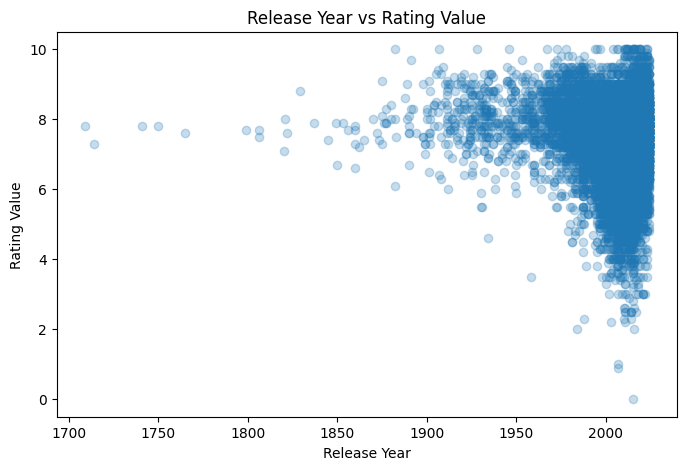

In [11]:
df_year = df[["Release Year", "Rating Value"]].dropna()

plt.figure(figsize=(8,5))
plt.scatter(
    df_year["Release Year"],
    df_year["Rating Value"],
    alpha=0.25
)
plt.xlabel("Release Year")
plt.ylabel("Rating Value")
plt.title("Release Year vs Rating Value")
plt.show()

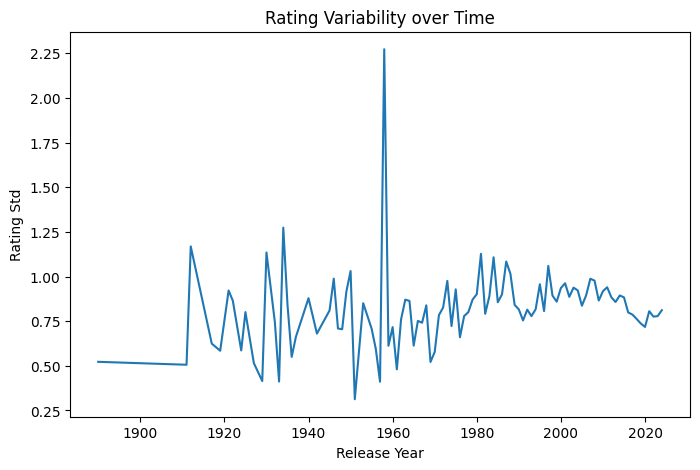

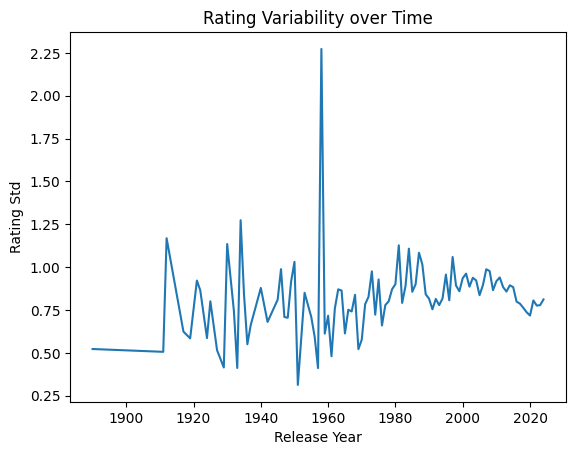

In [12]:
year_stats = (
    df.groupby("Release Year")["Rating Value"]
      .agg(["mean", "std", "count"])
      .reset_index()
)

year_stats = year_stats[year_stats["count"] >= 5]
year_stats = (
    df[["Release Year", "Rating Value"]]
    .dropna()
    .groupby("Release Year")["Rating Value"]
    .agg(["mean", "std", "count"])
    .reset_index()
)

year_stats = year_stats[year_stats["count"] >= 5]

plt.figure(figsize=(8,5))
plt.plot(
    year_stats["Release Year"],
    year_stats["std"]
)
plt.xlabel("Release Year")
plt.ylabel("Rating Std")
plt.title("Rating Variability over Time")
plt.show()
plt.plot(
    year_stats["Release Year"],
    year_stats["std"]
)

plt.xlabel("Release Year")
plt.ylabel("Rating Std")
plt.title("Rating Variability over Time")
plt.show()